# DEEP LEARNING MODEL

After doing the exploration of the data we do the imports required for the deep learning model

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import ensemble, model_selection

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


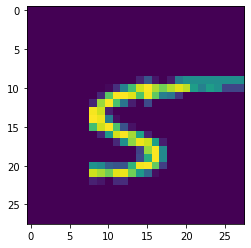

In [2]:
df = pd.read_csv("train.csv")
x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
y = df.label.to_numpy()
image = x[244]
plt.imshow(image.squeeze())

In [3]:
y[244]

5

In [4]:
train = pd.read_csv("train.csv").values
X = train[:, 1:]
Y = train[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
forest = ensemble.RandomForestClassifier(
        n_estimators = 1000,
        max_depth = 10,
        min_samples_split = 4,
        n_jobs = -1,
        random_state = 1 )
forest = forest.fit(x_train, y_train)

In [5]:
forest.score(x_train, y_train)

0.9754421768707483

In [6]:
scores = model_selection.cross_val_score(forest, x_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1)
scores

array([0.9537415 , 0.95646259, 0.93911565, 0.94693878, 0.95170068,
       0.92959184, 0.95306122, 0.94489796, 0.93605442, 0.94353741])

In [7]:
scores.mean()

0.9455102040816327

In [8]:
forest_ = forest.predict(x_test)

In [9]:
metrics.classification_report(y_test,forest_)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      1237\n           1       0.96      0.98      0.97      1401\n           2       0.95      0.94      0.94      1240\n           3       0.94      0.91      0.93      1294\n           4       0.95      0.93      0.94      1243\n           5       0.95      0.94      0.95      1086\n           6       0.96      0.97      0.97      1254\n           7       0.95      0.95      0.95      1313\n           8       0.94      0.93      0.94      1236\n           9       0.89      0.92      0.90      1296\n\n    accuracy                           0.95     12600\n   macro avg       0.95      0.95      0.95     12600\nweighted avg       0.95      0.95      0.95     12600\n'

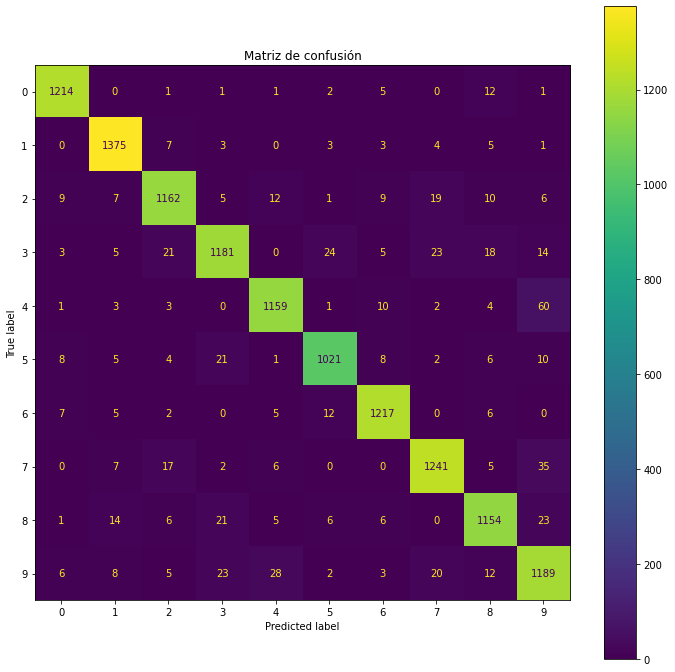

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = metrics.confusion_matrix(y_test,forest_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

In [13]:
import csv
from PIL import Image
original = Image.open('myIMG.jpeg')
mod = original.convert('L')
array = np.asarray(mod.resize((28,28)), dtype=np.int64)
my_array = [0,]
header = ['label']
count = 0
for i in array:
    for j in i:
        my_array.append(j)
        header.append('pixel' + str(count))
        count += 1
with open('myIMG.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(my_array)

In [40]:
def write_prediction(prediction, name):
    df = pd.read_csv(name)
    x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
    y = df.label.to_numpy()
    X = train[:, 1:]
    Y = train[:, 0]
    solution = prediction.predict(X)
    image = x[0]
    plt.imshow(image.squeeze())
    return(solution)

0

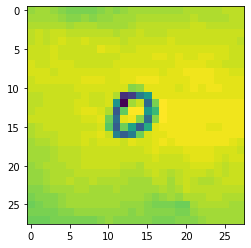

In [41]:
write_prediction(forest, "myIMG.csv")[1]